In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_ecommerce.csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking for null values

In [4]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
df = df.dropna()
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


Convert InvoiceDate from object to datetime

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Changing CustomerID from float to object.
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
df.describe()

,InvoiceDate,Quantity,UnitPrice
count,406829,406829.000000,406829.000000
mean,2011-07-10 16:30:57.879207424,50.478471,50.477654
min,2010-12-01 08:26:00,1.000000,1.000000
25%,2011-04-06 15:02:00,25.000000,25.710000
50%,2011-07-31 11:48:00,50.000000,50.430000
75%,2011-10-20 13:06:00,75.000000,75.170000
max,2011-12-09 12:50:00,100.000000,100.000000
std,NaN,28.872921,28.573075


In [8]:
df['TotalSales'] = df['Quantity'] * df ['UnitPrice']
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalSales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35


In [9]:
df.describe()

,InvoiceDate,Quantity,UnitPrice,TotalSales
count,406829,406829.000000,406829.000000,406829.000000
mean,2011-07-10 16:30:57.879207424,50.478471,50.477654,2550.053514
min,2010-12-01 08:26:00,1.000000,1.000000,1.000000
25%,2011-04-06 15:02:00,25.000000,25.710000,723.840000
50%,2011-07-31 11:48:00,50.000000,50.430000,1914.870000
75%,2011-10-20 13:06:00,75.000000,75.170000,3885.120000
max,2011-12-09 12:50:00,100.000000,100.000000,9999.000000
std,NaN,28.872921,28.573075,2211.425935


In [10]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'TotalSales'],
      dtype='object')

EDA for The Categorical Features


In [11]:
# Checking total unique values in each categorical columns
print(f" Total Unique Customers = {df['CustomerID'].nunique()}")
print(f" Total Unique Products = {df['Description'].nunique()}")
print(f" Total Unique Products Code= {df['StockCode'].nunique()}")
print(f" Total Unique Countries= {df['Country'].nunique()}")

 Total Unique Customers = 4372
 Total Unique Products = 10
 Total Unique Products Code= 9000
 Total Unique Countries= 28


Observation: The dataset has 406829 transactions with valid Customer ID. 4372 Unique customers, 28 Countries, 10 Product categories and 9000 products.

In [12]:
category_feature =['CustomerID', 'StockCode', 'Description', 'Country']

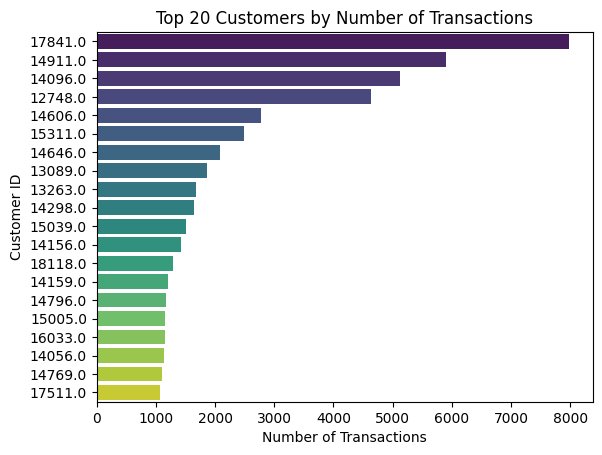

In [13]:
# Top 20 customers by number of transactions
top_customers = df['CustomerID'].value_counts().head(20)
sns.barplot(x=top_customers.values, y=top_customers.index, hue =top_customers.index, palette='viridis')
plt.title("Top 20 Customers by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()

   



In [14]:
highpay_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
highpay_customers

CustomerID
17841.0    20383830.65
14911.0    15362741.47
14096.0    12965429.74
12748.0    11912482.34
14606.0     7144512.92
              ...     
13366.0          99.12
17347.0          66.30
16881.0          60.32
15753.0          30.82
15524.0          17.36
Name: TotalSales, Length: 4372, dtype: float64

In [35]:
country_cust = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending = False)
country_cust

Country
Mozambique       3072
Benin            3054
Togo             3053
Nigeria          3051
Burkina Faso     3049
Sierra Leone     3046
Mali             3044
Algeria          3043
Senegal          3040
Niger            3039
Zimbabwe         3036
Sudan            3036
Zambia           3036
Tanzania         3035
Ghana            3035
Ethiopia         3035
Madagascar       3031
Libya            3030
Egypt            3029
Cameroon         3029
Tunisia          3028
Cote d'Ivoire    3026
South Africa     3026
Rwanda           3018
Kenya            3009
Somalia          3008
Morocco          2993
Uganda           2981
Name: CustomerID, dtype: int64

In [15]:
country_pay = df.groupby('Country')['TotalSales'].sum().sort_values(ascending = False)
country_pay

Country
Libya            37690362.35
Somalia          37663830.57
Togo             37592496.96
Mali             37508467.02
Ghana            37414593.40
Nigeria          37364243.60
Ethiopia         37228695.13
Mozambique       37145464.36
Sierra Leone     37140824.43
Algeria          37140683.52
Cameroon         37133617.61
Sudan            37131805.58
Zimbabwe         37123334.80
South Africa     37098773.60
Morocco          37093012.42
Senegal          37059812.37
Cote d'Ivoire    36998048.63
Kenya            36987357.61
Benin            36921841.33
Rwanda           36864615.30
Tunisia          36837574.80
Tanzania         36820360.73
Niger            36808276.74
Burkina Faso     36671763.77
Egypt            36619734.48
Uganda           36598727.25
Madagascar       36524344.59
Zambia           36253058.16
Name: TotalSales, dtype: float64

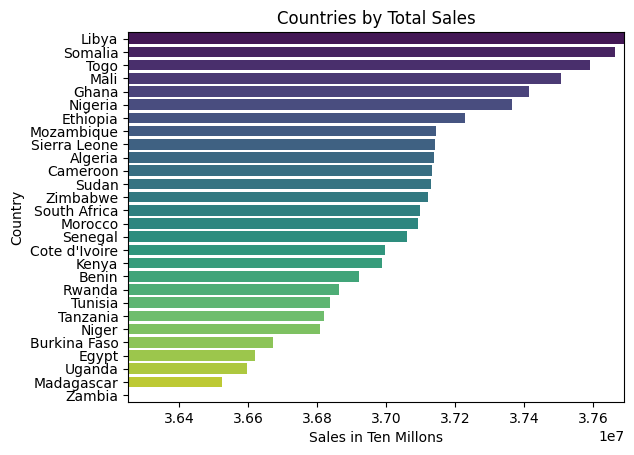

In [16]:
sns.barplot(x=country_pay.values, y=country_pay.index, hue =country_pay.index, palette='viridis')
plt.title("Countries by Total Sales")
plt.xlabel("Sales in Ten Millons")
plt.xlim(min(country_pay.values) - 5, max(country_pay.values) + 10)
plt.ylabel("Country")
plt.show()

In [17]:
#Number of Category(Distribution) by Products(Stock code)
Category = df.groupby('Description')['StockCode'].nunique().sort_values(ascending =False)
Category


#df.groupby('Description')['StockCode'].value_counts()

Description
Jewelry             8925
Furniture           8921
Sports Equipment    8918
Toys                8914
Cosmetics           8913
Electronics         8910
Books               8908
Kitchenware         8906
Shoes               8899
Cloths              8892
Name: StockCode, dtype: int64

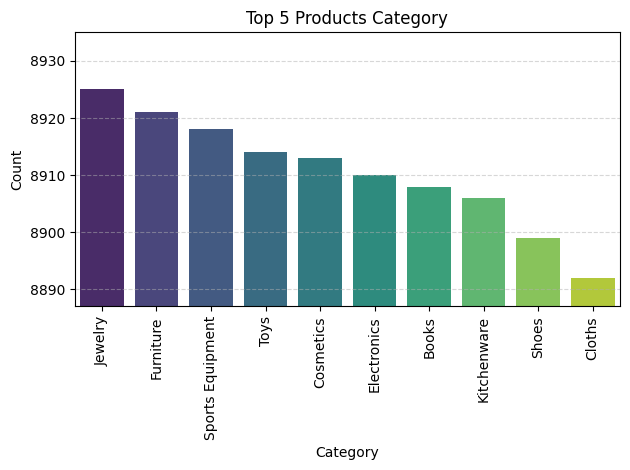

In [18]:
sns.barplot(x=Category.index, y=Category.values, hue=Category.index, palette ='viridis')
plt.title("Top 5 Products Category")
plt.ylabel("Count")
plt.ylim(min(Category.values) - 5, max(Category.values) + 10)
plt.xlabel("Category")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
category_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
category_sales

Description
Shoes               1.047055e+08
Jewelry             1.042335e+08
Sports Equipment    1.040682e+08
Cloths              1.039723e+08
Furniture           1.039004e+08
Toys                1.038980e+08
Electronics         1.034930e+08
Kitchenware         1.034123e+08
Cosmetics           1.032372e+08
Books               1.025154e+08
Name: TotalSales, dtype: float64

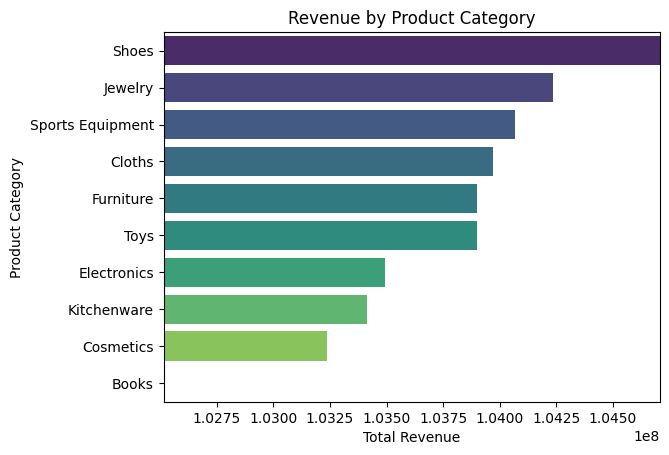

In [20]:
#category_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, palette='viridis')
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.xlim(min(category_sales.values) - 5, max(category_sales.values) + 10)
plt.ylabel("Product Category")
plt.show()

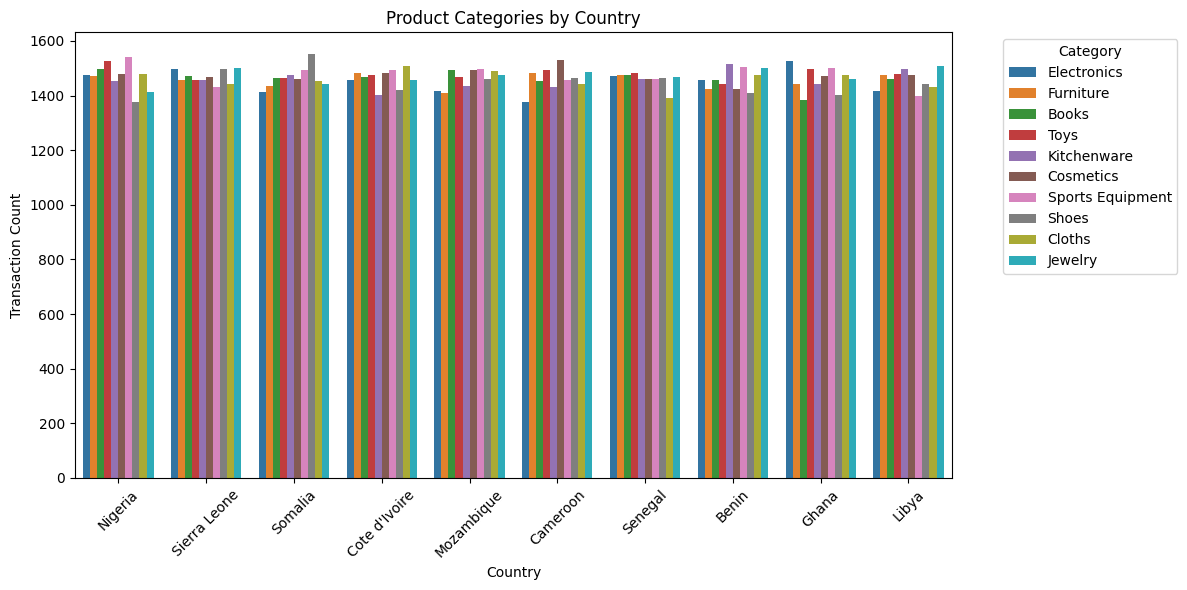

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Description', order=df['Country'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Product Categories by Country")
plt.xlabel("Country")
plt.ylabel("Transaction Count")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
Prod = df.groupby('StockCode')['TotalSales'].sum().reset_index(name='Revenue')
Prod = Prod.sort_values(by='Revenue', ascending=False).reset_index()
Prod

,index,StockCode,Revenue
0,4379,SC5379,207267.38
1,2226,SC3226,205811.18
2,2619,SC3619,205371.96
3,2939,SC3939,203974.79
4,6671,SC7671,202623.19
...,...,...,...
8995,5115,SC6115,48200.09
8996,1962,SC2962,46886.96
8997,7075,SC8075,44401.76
8998,8332,SC9332,36874.69


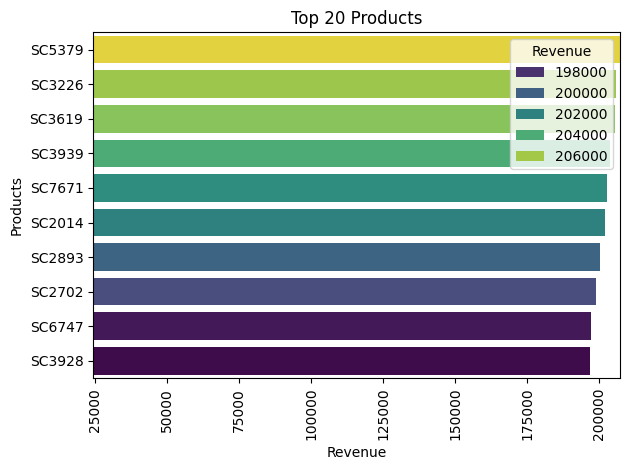

In [24]:
sns.barplot(data = Prod.head(10), y='StockCode', x='Revenue', hue='Revenue', palette ='viridis')
plt.title("Top 20 Products")
plt.ylabel("Products")
plt.xlim(min(Prod['Revenue'])- 5, max(Prod['Revenue']) +10 )
plt.xlabel("Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

EDA for the Numerical Features

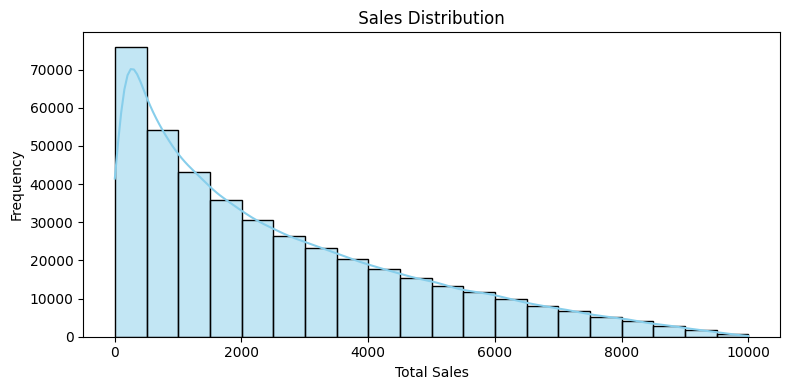

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalSales'], kde=True, bins=20, color='skyblue')
plt.title(' Sales Distribution ')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [28]:
numerical = ['Quantity', 'UnitPrice','TotalSales' ]

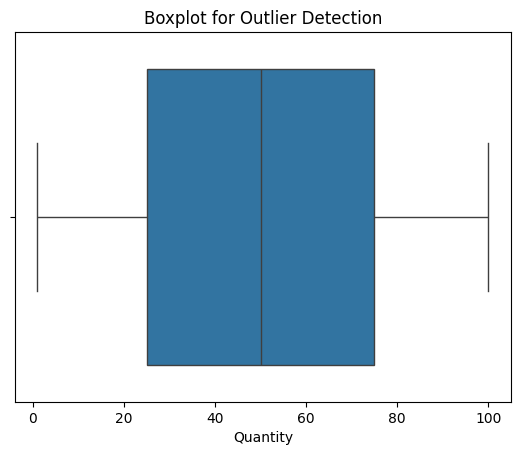

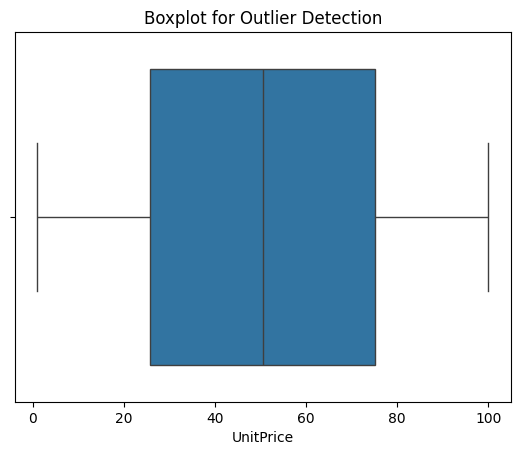

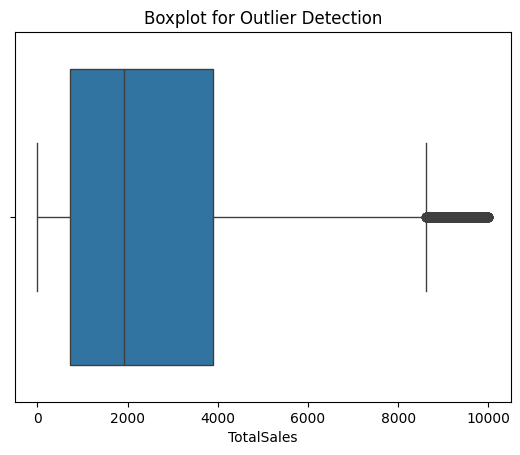

In [32]:
for feat in numerical :
    sns.boxplot(x=df[feat])
    plt.title('Boxplot for Outlier Detection')
    plt.show()


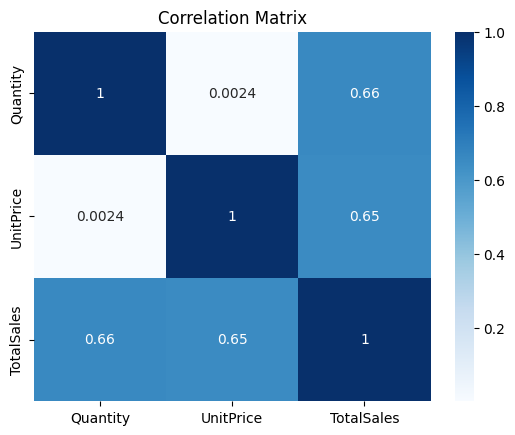

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

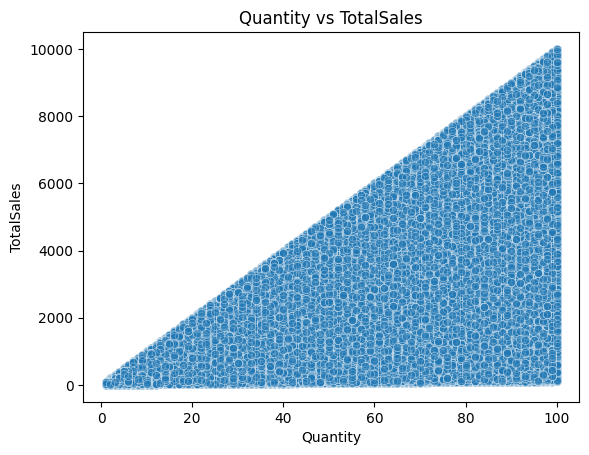

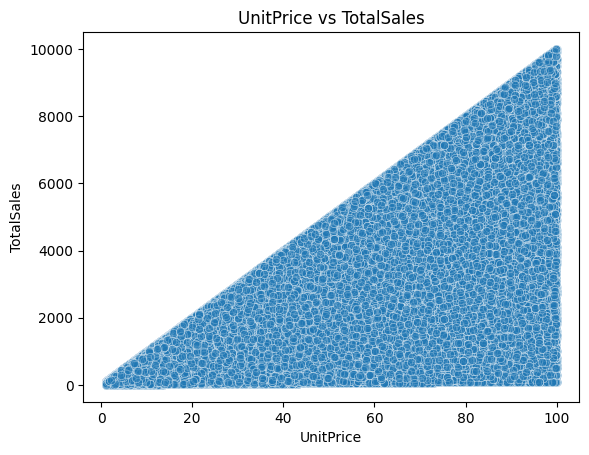

In [34]:
sns.scatterplot(data=df, x='Quantity', y='TotalSales', alpha=0.5)
plt.title("Quantity vs TotalSales")
plt.show()

sns.scatterplot(data=df, x='UnitPrice', y='TotalSales', alpha=0.5)
plt.title("UnitPrice vs TotalSales")
plt.show()

RECENCY, FREQUENCY, MONETARY

In [44]:
# reference point - day after latest transaction
max_date = df['InvoiceDate'].max() +pd.Timedelta(days=1)

In [50]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(max_date - x.max()).days, #recency
    'InvoiceNo': 'nunique',                            #frequency
    'TotalSales': 'sum'                                #Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSales': 'Monetary'
}, inplace=True)

rfm.sort_values(by= 'Frequency', ascending=False)

,Recency,Frequency,Monetary
CustomerID,,,
14911.0,1,248,15362741.47
12748.0,1,224,11912482.34
17841.0,2,169,20383830.65
14606.0,1,128,7144512.92
13089.0,3,118,4739395.74
...,...,...,...
13877.0,86,1,14054.71
16400.0,95,1,89089.39
13878.0,55,1,82748.63


In [52]:
rfm.sort_values(by= 'Recency', ascending= True)

,Recency,Frequency,Monetary
CustomerID,,,
17491.0,1,11,290186.78
16933.0,1,5,117459.04
16558.0,1,24,1175152.21
13026.0,1,8,107545.64
17364.0,1,12,1111391.60
...,...,...,...
18074.0,374,1,29052.60
12791.0,374,1,1305.70
17908.0,374,1,145427.69


Retension Rate Analysis


In [36]:
data = df.copy()
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalSales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [38]:
#Create month and Year fied
data['Year'] = df['InvoiceDate'].dt.year
data['Month'] = df['InvoiceDate'].dt.month
data['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalSales,Year,Month,YearMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,12,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,12,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010,12,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010,12,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010,12,2010-12


In [41]:
# identify first purchase for each customer
first_purchase = data.groupby('CustomerID')['YearMonth'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchase_month']
first_purchase

,CustomerID,FirstPurchase_month
0,12346.0,2011-01
1,12347.0,2010-12
2,12348.0,2010-12
3,12349.0,2011-11
4,12350.0,2011-02
...,...,...
4367,18280.0,2011-03
4368,18281.0,2011-06
4369,18282.0,2011-08
4370,18283.0,2011-01
